In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

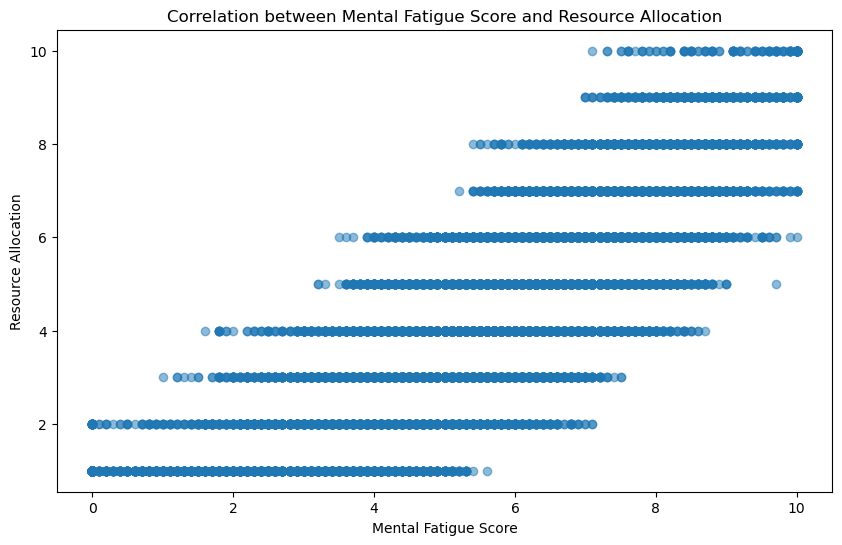

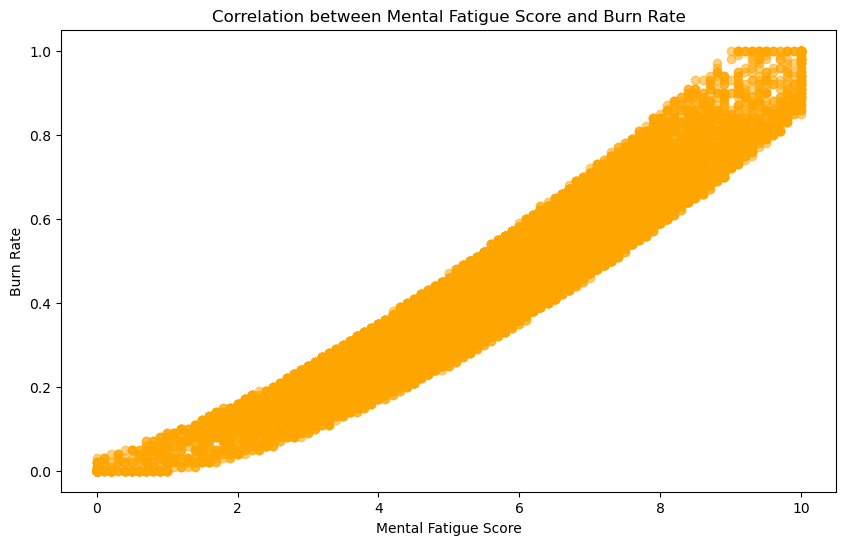

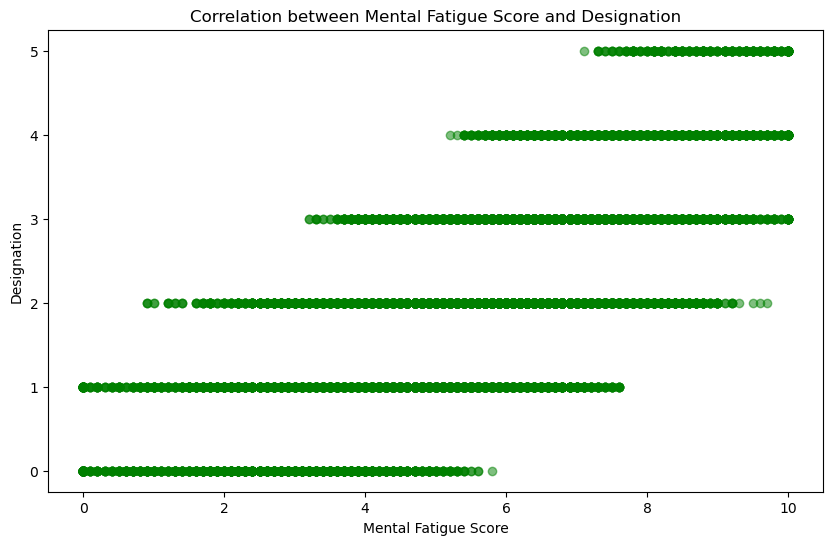

In [23]:
data = pd.read_csv('./Data/train.csv')

# Clean the data by removing rows with missing values
clean_data = data.dropna()

# Plot correlations between 'Mental Fatigue Score' and other numerical values
figures = []

# Correlation between Mental Fatigue Score and Resource Allocation
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Mental Fatigue Score'], clean_data['Resource Allocation'], alpha=0.5)
plt.title('Correlation between Mental Fatigue Score and Resource Allocation')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Resource Allocation')
figures.append(plt.gcf())

# Correlation between Mental Fatigue Score and Burn Rate
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Mental Fatigue Score'], clean_data['Burn Rate'], alpha=0.5, color='orange')
plt.title('Correlation between Mental Fatigue Score and Burn Rate')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
figures.append(plt.gcf())

# Correlation between Mental Fatigue Score and Designation
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Mental Fatigue Score'], clean_data['Designation'], alpha=0.5, color='green')
plt.title('Correlation between Mental Fatigue Score and Designation')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Designation')
figures.append(plt.gcf())

# Display the plots
for fig in figures:
    plt.show()

In [24]:
# Select the features and target variable
X = clean_data[['Mental Fatigue Score', 'Designation', 'Resource Allocation']]
y = clean_data['Burn Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict burn rate for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Prepare a sample input for future prediction
sample_input = pd.DataFrame({
    'Mental Fatigue Score': [5.0],
    'Designation': [3],
    'Resource Allocation': [6.0]
})

# Predict burn rate for the sample input
future_burn_rate_prediction = model.predict(sample_input)

mse, r2, future_burn_rate_prediction

(0.003106898699959498, 0.9191012633766691, array([0.43798225]))

In [25]:
# Assuming you have the necessary imports and data preparation steps done
# Recalculate the predictions for visualization purposes
predictions = model.predict(X)

# Create a DataFrame with actual and predicted values
results = X.copy()
results['Actual Burn Rate'] = y
results['Predicted Burn Rate'] = predictions

# Display the head of the DataFrame
print(results.head())

   Mental Fatigue Score  Designation  Resource Allocation  Actual Burn Rate  \
0                   3.8          2.0                  3.0              0.16   
1                   5.0          1.0                  2.0              0.36   
3                   2.6          1.0                  1.0              0.20   
4                   6.9          3.0                  7.0              0.52   
5                   3.6          2.0                  4.0              0.29   

   Predicted Burn Rate  
0             0.265750  
1             0.331029  
3             0.122778  
4             0.608944  
5             0.280095  


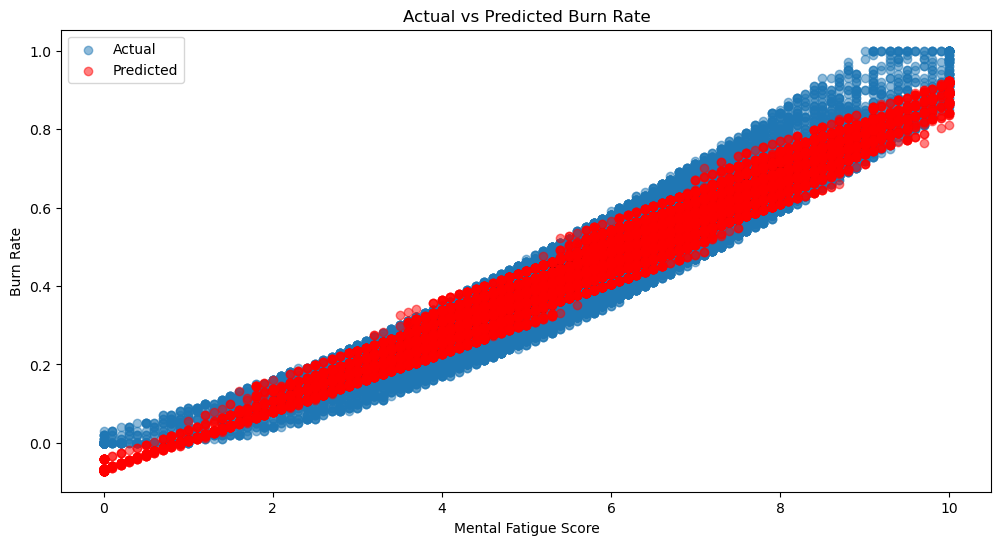

In [26]:
# Plot the actual vs predicted Burn Rates
plt.figure(figsize=(12, 6))
plt.scatter(results['Mental Fatigue Score'], results['Actual Burn Rate'], label='Actual', alpha=0.5)
plt.scatter(results['Mental Fatigue Score'], results['Predicted Burn Rate'], label='Predicted', alpha=0.5, color='red')
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
plt.legend()
plt.show()

C:\Users\kille\AppData\Local\Temp\ipykernel_54656\1243868264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date of Joining'] = pd.to_datetime(clean_data['Date of Joining'])
C:\Users\kille\AppData\Local\Temp\ipykernel_54656\1243868264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Year of Joining'] = clean_data['Date of Joining'].dt.year
C:\Users\kille\AppData\Local\Temp\ipykernel_54656\1243868264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

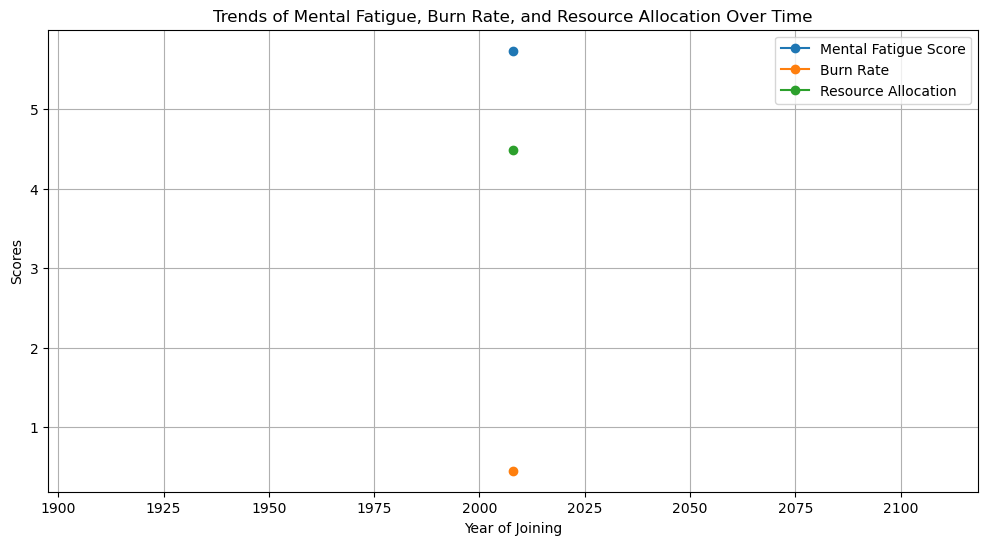

In [27]:
# Convert 'Date of Joining' to datetime format
clean_data['Date of Joining'] = pd.to_datetime(clean_data['Date of Joining'])

# Extract year and month from 'Date of Joining'
clean_data['Year of Joining'] = clean_data['Date of Joining'].dt.year
clean_data['Month of Joining'] = clean_data['Date of Joining'].dt.to_period('M')

# Aggregate data to calculate average mental fatigue scores, burn rate, and resource allocation over time
yearly_trends = clean_data.groupby('Year of Joining').agg({
    'Mental Fatigue Score': 'mean',
    'Burn Rate': 'mean',
    'Resource Allocation': 'mean'
}).reset_index()

# Plot the trends over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['Year of Joining'], yearly_trends['Mental Fatigue Score'], marker='o', label='Mental Fatigue Score')
plt.plot(yearly_trends['Year of Joining'], yearly_trends['Burn Rate'], marker='o', label='Burn Rate')
plt.plot(yearly_trends['Year of Joining'], yearly_trends['Resource Allocation'], marker='o', label='Resource Allocation')
plt.title('Trends of Mental Fatigue, Burn Rate, and Resource Allocation Over Time')
plt.xlabel('Year of Joining')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kille\AppData\Local\Temp\ipykernel_54656\2189513282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date of Joining'] = pd.to_datetime(clean_data['Date of Joining'])
C:\Users\kille\AppData\Local\Temp\ipykernel_54656\2189513282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Year of Joining'] = clean_data['Date of Joining'].dt.year


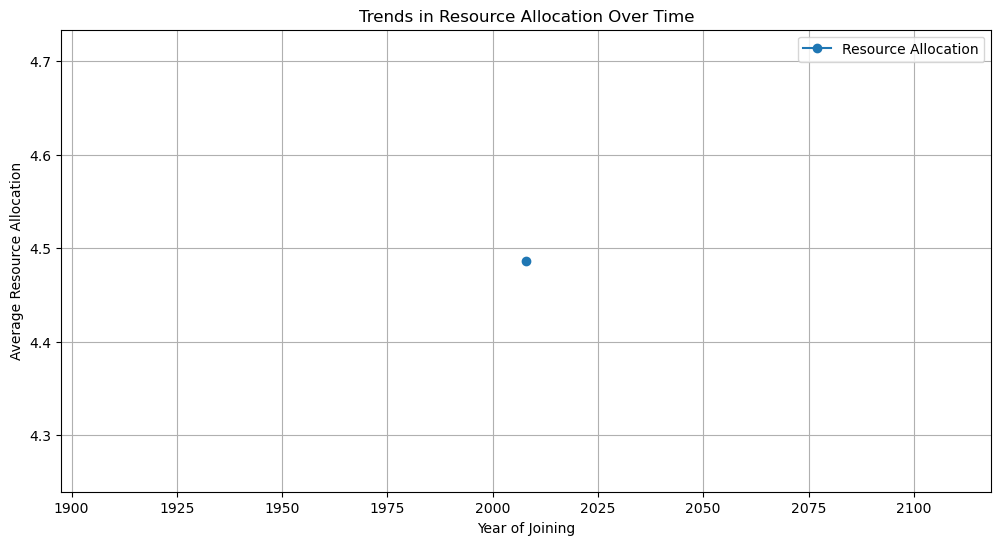

In [28]:
# Assuming 'clean_data' is your DataFrame
# Convert 'Date of Joining' to datetime format
clean_data['Date of Joining'] = pd.to_datetime(clean_data['Date of Joining'])

# Extract year from 'Date of Joining'
clean_data['Year of Joining'] = clean_data['Date of Joining'].dt.year

# Aggregate data to calculate average resource allocation over time
resource_allocation_trends = clean_data.groupby('Year of Joining').agg({
    'Resource Allocation': 'mean'
}).reset_index()

# Plot the trends in resource allocation over time
plt.figure(figsize=(12, 6))
plt.plot(resource_allocation_trends['Year of Joining'], resource_allocation_trends['Resource Allocation'], marker='o', label='Resource Allocation')
plt.title('Trends in Resource Allocation Over Time')
plt.xlabel('Year of Joining')
plt.ylabel('Average Resource Allocation')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 1.283343832863139
R-squared: 0.6475072319381683


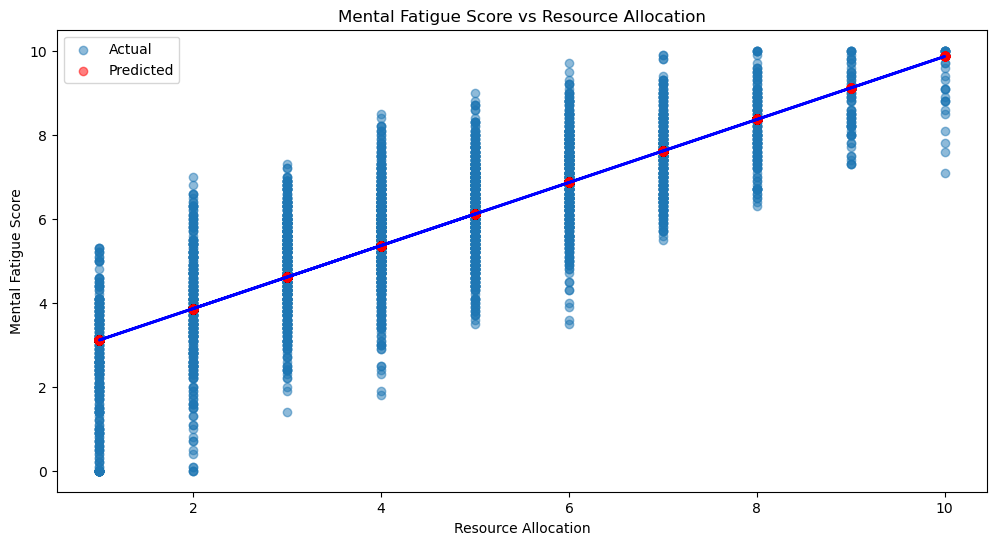

In [29]:
# Assuming 'clean_data' is your DataFrame
X = clean_data[['Resource Allocation']]
y = clean_data['Mental Fatigue Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict mental fatigue for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a DataFrame with actual and predicted values for visualization
results = X_test.copy()
results['Actual Mental Fatigue Score'] = y_test
results['Predicted Mental Fatigue Score'] = y_pred

# Plot the actual vs predicted Mental Fatigue Scores
plt.figure(figsize=(12, 6))
plt.scatter(results['Resource Allocation'], results['Actual Mental Fatigue Score'], label='Actual', alpha=0.5)
plt.scatter(results['Resource Allocation'], results['Predicted Mental Fatigue Score'], label='Predicted', alpha=0.5, color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title('Mental Fatigue Score vs Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Mental Fatigue Score')
plt.legend()
plt.show()

In [30]:
# Assuming 'clean_data' is your DataFrame
# Encode categorical variables
le = LabelEncoder()
clean_data['Gender'] = le.fit_transform(clean_data['Gender'])
clean_data['Company Type'] = le.fit_transform(clean_data['Company Type'])

# Select the relevant features (exclude WFH data)
X = clean_data[['Designation', 'Resource Allocation']]
y = clean_data['Mental Fatigue Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict mental fatigue for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Extract coefficients and p-values using statsmodels for detailed analysis
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()
print(model_summary)


Mean Squared Error: 1.280860837390563
R-squared: 0.6481892299536656
                             OLS Regression Results                             
Dep. Variable:     Mental Fatigue Score   R-squared:                       0.638
Model:                              OLS   Adj. R-squared:                  0.638
Method:                   Least Squares   F-statistic:                 1.308e+04
Date:                  Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                          05:16:01   Log-Likelihood:                -23283.
No. Observations:                 14872   AIC:                         4.657e+04
Df Residuals:                     14869   BIC:                         4.659e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\kille\AppData\Local\Temp\ipykernel_54656\107269018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Gender'] = le.fit_transform(clean_data['Gender'])
C:\Users\kille\AppData\Local\Temp\ipykernel_54656\107269018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Company Type'] = le.fit_transform(clean_data['Company Type'])


In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract relevant columns
X = clean_data[['Resource Allocation', 'Burn Rate']]
y = clean_data['Mental Fatigue Score']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Mental Fatigue Score   R-squared:                       0.892
Model:                              OLS   Adj. R-squared:                  0.892
Method:                   Least Squares   F-statistic:                 7.684e+04
Date:                  Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                          05:16:01   Log-Likelihood:                -17814.
No. Observations:                 18590   AIC:                         3.563e+04
Df Residuals:                     18587   BIC:                         3.566e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5979      0.012    136.059      0.000       1.575       1.621
Resource Allocation    -0.0276      0.004     -6.317      0.000      -0.036      -0.019
Burn Rate               9.4110      0.045    208.682      0.000       9.323       9.499
==============================================================================
Omnibus:                     1852.944   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.590
Skew:                          -0.115   Prob(JB):                    2.80e-125
Kurtosis:                       2.171   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

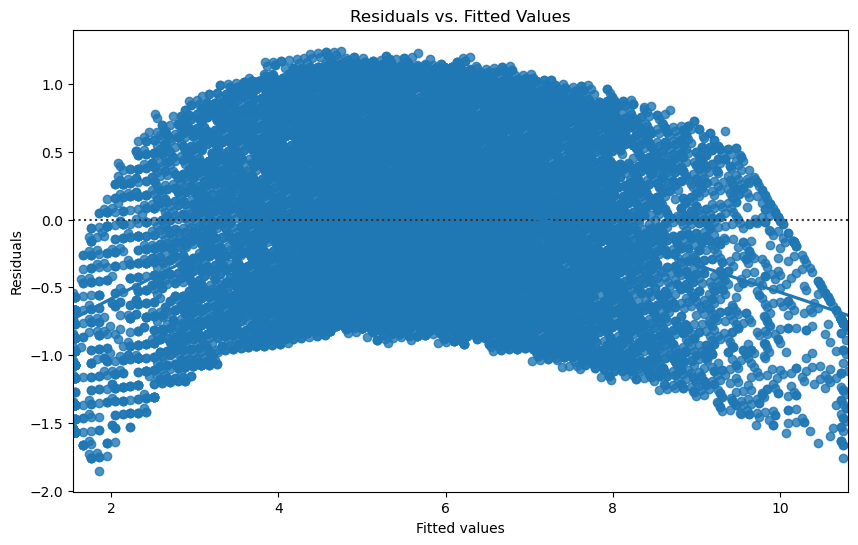

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

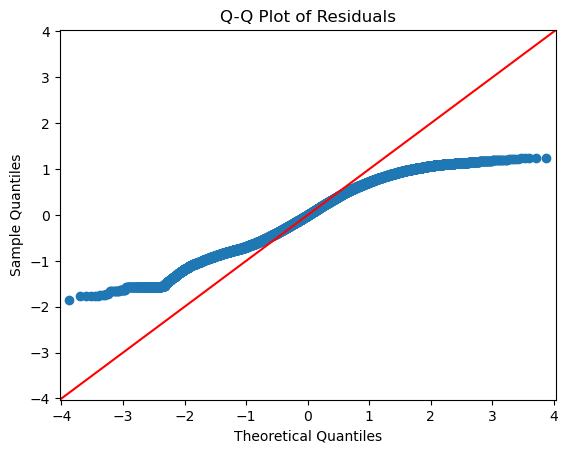

In [33]:
# Q-Q plot for normality
sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [34]:
# Check VIF to detect multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,6.441954,const
1,3.717932,Resource Allocation
2,3.717932,Burn Rate


In [36]:
# Extract coefficients and p-values
intercept_coef = model.params['const']
ra_coef = model.params['Resource Allocation']
br_coef = model.params['Burn Rate']

intercept_pvalue = model.pvalues['const']
ra_pvalue = model.pvalues['Resource Allocation']
br_pvalue = model.pvalues['Burn Rate']

# Extract R-squared values
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

# Extract VIF factors
vif_intercept = vif.loc[vif['features'] == 'const', 'VIF Factor'].values[0]
vif_ra = vif.loc[vif['features'] == 'Resource Allocation', 'VIF Factor'].values[0]
vif_br = vif.loc[vif['features'] == 'Burn Rate', 'VIF Factor'].values[0]

(intercept_coef, ra_coef, br_coef, intercept_pvalue, ra_pvalue, br_pvalue, r_squared, adj_r_squared, vif_intercept, vif_ra, vif_br)

(1.5979084118325044,
 -0.027563775452354243,
 9.41095041881613,
 0.0,
 2.724867703346014e-10,
 0.0,
 0.8921013972045752,
 0.8920897870896781,
 6.441953639491534,
 3.717932271198696,
 3.717932271198695)